In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def sigmoid(z):
    ans = 1/(1 + np.exp(-z))
    return ans 

In [3]:
df = pd.read_csv('exam selection.csv')

Text(0.5, 1.0, 'Exam marks and data')

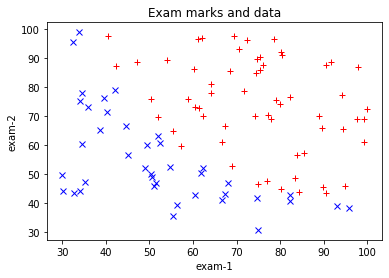

In [4]:
positive_data = df[df['selection'] == 1]
negative_data = df[df['selection'] == 0]
plt.plot(positive_data.iloc[:,0],positive_data.iloc[:,1],'r+')
plt.plot(negative_data.iloc[:,0],negative_data.iloc[:,1],'bx')
plt.xlabel('exam-1')
plt.ylabel('exam-2')
#plt.legend('selected','not selected')
plt.title('Exam marks and data')

In [5]:
# Making input values : 
x1 = df['exam-1']
x2 = df['exam-2']
X = np.array([x1,x2])
# Making ouput : 
Y = np.array([df['selection']])
print(Y.shape)

(1, 100)


In [57]:
def Logistics(X,Y,iterations = 10000,learning_rate = 0.0011):
    # intializing weights and bias : 
    w = np.zeros((2,1))
    b = 0
    m = Y.shape[1] # number of examples
    for i in range(1,iterations + 1)  :
        z = np.dot(w.T,X) + b
        h = sigmoid(z)
        cost = (-1/m) * np.sum(Y*np.log(h) + (1-Y)*np.log(1-h))
        dz = h - Y
        dw = (1/m)*np.dot(X,dz.T)
        db = (1/m)*np.sum(dz)
        w = w - learning_rate*dw
        b = b - learning_rate*db
        
        if i % 1000 == 0:
            print('Cost after',i,'iterations :',cost)
    return w,b

In [58]:
w,b = Logistics(X,Y)

Cost after 1000 iterations : 0.6893719801752984
Cost after 2000 iterations : 0.682057774636633
Cost after 3000 iterations : 0.6747748266355481
Cost after 4000 iterations : 0.667524449660979
Cost after 5000 iterations : 0.6603079901543056
Cost after 6000 iterations : 0.6531268298360436
Cost after 7000 iterations : 0.6459823885020429
Cost after 8000 iterations : 0.6388761274224087
Cost after 9000 iterations : 0.631809553517849
Cost after 10000 iterations : 0.6247842245463288


[30.05882245 99.8278578 ]


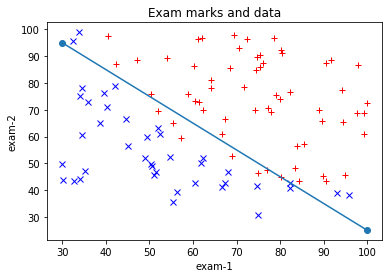

In [61]:
## plotting decision boundaries : 

def decision_boundary(df,X,Y,w,b):
    plt.figure()
    positive_data = df[df['selection'] == 1]
    negative_data = df[df['selection'] == 0]
    plt.plot(positive_data.iloc[:,0],positive_data.iloc[:,1],'r+')
    plt.plot(negative_data.iloc[:,0],negative_data.iloc[:,1],'bx')
    plt.xlabel('exam-1')
    plt.ylabel('exam-2')
    plt.title('Exam marks and data')
    
    # decisison boundary is plotted by computing z = 0 :
    
    # if number of parameters are only 2 :
    # then we can plot a straight line directly as :    
    if X.shape[0] <= 2 : 
        x = np.array([np.min(X[0]),np.max(X[0])])
        y = (-1/0.2)*(-25 + 0.2*x)
        print(x)
        plt.plot(x,y,'-o')
    plt.show()

decision_boundary(df,X,Y,w,b)

## function plotDecisionBoundary(theta, X, y)
#### PLOTDECISIONBOUNDARY Plots the data points X and y into a new figure with
#### the decision boundary defined by theta
####    PLOTDECISIONBOUNDARY(theta, X,y) plots the data points with + for the 
####    positive examples and o for the negative examples. X is assumed to be a either 
####   1) Mx3 matrix, where the first column is an all-ones column for the 
####      intercept.
####    2) MxN, N>3 matrix, where the first column is all-ones

###  Plot Data
plotData(X(:,2:3), y);
hold on


### if number of parameters are less than 3 because 1st column is all ones for MATLAB
if size(X, 2) <= 3
    # Only need 2 points to define a line, so choose two endpoints
    plot_x = [min(X(:,2))-2,  max(X(:,2))+2];

    # Calculate the decision boundary line
    plot_y = (-1./theta(3)).*(theta(2).*plot_x + theta(1));

    # Plot, and adjust axes for better viewing
    plot(plot_x, plot_y)
    
    # Legend, specific for the exercise
    legend('Admitted', 'Not admitted', 'Decision Boundary')
    axis([30, 100, 30, 100])
    
### if number of parameter are more than 3 
else
    # Here is the grid range
    u = linspace(-1, 1.5, 50);
    v = linspace(-1, 1.5, 50);

    z = zeros(length(u), length(v));
    # Evaluate z = theta*x over the grid
    for i = 1:length(u)
        for j = 1:length(v)
            z(i,j) = mapFeature(u(i), v(j))*theta;
        end
    end
    z = z'; % important to transpose z before calling contour

    # Plot z = 0
    # Notice you need to specify the range [0, 0]
    contour(u, v, z, [0, 0], 'LineWidth', 2)
end
hold off
end


In [59]:
print(w,b)

[[0.01210401]
 [0.00183566]] -0.7466715646620984
